<a href="https://colab.research.google.com/github/Mj-Novoa/Challenge_TelecomX_PARTE2/blob/main/datostratadosparte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Telecom X – Análisis y Predicción de Cancelación (Churn)

## 📌 Descripción del Proyecto  
Este proyecto tiene como objetivo analizar y predecir la **cancelación de clientes (churn)** en la empresa **Telecom X**.  

En la **Parte 1**, se llevó a cabo un **análisis exploratorio de datos (EDA)** para comprender los principales factores asociados a la evasión de clientes, incluyendo el impacto de los contratos, cargos mensuales, soporte técnico y métodos de pago.  

En la **Parte 2**, se desarrollaron **modelos predictivos de Machine Learning** para anticipar qué clientes tienen mayor probabilidad de abandonar la compañía, permitiendo así generar estrategias proactivas de retención.  


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#🛠️ Preparación de los Datos

---



# 📂 Extracción del Archivo Tratado  

Se importa el **DataFrame** generado en la **Parte 1 del desafío**, el cual ya cuenta con los datos debidamente procesados y preparados para su análisis en esta etapa.  


##DataFrame limpio

In [ ]:
df = pd.read_csv('/content/df_limpioEtapa1.csv')
df.sample(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
4135,5846-NEQVZ,No,Male,0,Yes,Yes,71,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic),2.33,70.85,4973.40
2767,3938-YFPXD,No,Male,0,No,No,72,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),2.78,84.30,5997.10
1431,2108-XWMPY,Yes,Male,0,No,No,3,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,1.19,35.45,106.85
1811,2642-DTVCO,Yes,Male,1,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,2.76,85.05,746.50
2983,4277-BWBML,No,Male,0,Yes,Yes,72,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0.61,19.95,1322.85
1956,2833-SLKDQ,Yes,Male,0,No,No,1,Yes,No,DSL,...,No,No,No,No,Month-to-month,No,Mailed check,1.50,45.05,45.05
2599,3714-NTNFO,No,Female,0,No,No,49,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,2.66,84.50,3906.70
4199,5930-GBIWP,No,Male,0,No,No,69,Yes,Yes,DSL,...,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic),2.68,81.50,5553.25
608,0895-DQHEW,Yes,Male,0,Yes,No,54,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.26,104.30,5278.15
6214,8782-NUUOL,No,Male,0,No,No,60,Yes,No,DSL,...,Yes,Yes,Yes,Yes,One year,No,Mailed check,2.67,79.00,4801.10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

# 🗑️ Eliminación de Columnas Irrelevantes  

Se elimina la columna correspondiente al **ID del cliente**, dado que no aporta valor analítico al modelo y únicamente representa un identificador sin relevancia estadística para el estudio.  


In [ ]:
df = df.drop(columns=['customerID'])

###Reducir multicolinealidad

Para reducir la multicolinealidad, se unificaron las categorías “No” y “No service” presentes en diversas columnas con tres niveles. Esta transformación permite simplificar los datos sin comprometer la relevancia de la información, garantizando así una representación más consistente para el desarrollo del modelo predictivo.

In [ ]:
# crear uno df nuevo a partir de nuestro df
df_clean = df.copy()

# Aqui agrupamos no y no internet service
cols_to_fix = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

## 🔄 Codificación de Variables Categóricas (Encoding)

Con el fin de garantizar la compatibilidad de las variables categóricas con los algoritmos de *Machine Learning*, se aplicó un proceso de **codificación a formato numérico**.  

En este caso, se utilizó el método de **One-Hot Encoding**, que permite representar las categorías como variables binarias (0/1), evitando introducir sesgos y preservando la información de manera adecuada.  

In [ ]:
colum_categoricas = [
       'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'
]

df_encoded = pd.get_dummies(df_clean, columns=colum_categoricas, drop_first=True)
df_encoded

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.60,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.90,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.90,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.00,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.90,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,1.90,55.15,742.90,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,2.84,85.10,1873.70,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,1.55,50.30,92.75,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,2.30,67.85,4627.65,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7043 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

## 🔍 Verificación de Valores Nulos  

Como parte del proceso de preparación de los datos, es fundamental **identificar la presencia de valores nulos** dentro del dataset.  
La detección temprana de datos faltantes permite aplicar estrategias de tratamiento (imputación, eliminación o transformación), garantizando la calidad y consistencia del modelo predictivo.  


In [ ]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,11
account.Charges.Monthly,0
account.Charges.Total,11
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


## 🧹 Tratamiento de Valores Nulos  

Durante la verificación se identificaron valores nulos en las columnas **`Total.Day`** y **`account.Charges.Total`**.  
Dado que la proporción de valores faltantes es reducida, se evaluaron dos posibles estrategias de tratamiento:  

1. **Reemplazo por 0:**  
   Esta opción es válida únicamente si se desea representar explícitamente la ausencia de información o servicio. Sin embargo, podría introducir un sesgo no deseado en el análisis.  

2. **Eliminación de filas:**  
   Al tratarse de un volumen pequeño de datos nulos, la eliminación no afecta de manera significativa la integridad del dataset.  

### ✅ Decisión  
Se optó por **eliminar las filas con valores nulos**, priorizando la consistencia y calidad de los datos antes del modelado.  



In [ ]:
# Eliminar filas
df_encoded = df_encoded.dropna(subset=['Total.Day', 'account.Charges.Total'])

In [ ]:
# Confirmar cambios
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,0
account.Charges.Monthly,0
account.Charges.Total,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


## 📊 Verificación de la Proporción de Cancelación (Churn)  

Como siguiente paso, se evaluó la **distribución de la variable objetivo (`Churn`)** con el fin de identificar posibles problemas de desbalance en las clases.  


In [ ]:
# Verificamos la proporción de clientes que cancelaron vs los que permanecieron
df_encoded['Churn_Yes'].value_counts(normalize=True)

,proportion
Churn_Yes,
False,0.734215
True,0.265785


🔹 Resultados

Los resultados obtenidos indican que la proporción entre clientes que cancelan y los que permanecen no es adecuada, ya que se observa un desbalance mayor al permitido.
En términos generales, se considera aceptable un mínimo de 40% en la clase minoritaria para evitar un sesgo excesivo en los modelos de clasificación.

🔍 Conclusión

La variable objetivo presenta desbalance, lo que implica que será necesario aplicar técnicas de balanceo de clases (por ejemplo, undersampling, oversampling, SMOTE) antes de entrenar los modelos de Machine Learning, con el fin de garantizar predicciones más robustas y evitar sesgos hacia la clase mayoritaria.

# ⚖️ Balanceo de Clases  

La variable objetivo (`Churn`) presenta un desbalance significativo entre clientes que cancelan y clientes que permanecen en la compañía.  
Para evitar sesgos en los modelos de *Machine Learning* y mejorar su capacidad de generalización, se aplicaron tres técnicas de balanceo de clases:  

---

### 1️⃣ Undersampling (Reducción de la clase mayoritaria)  
- **Método:** `RandomUnderSampler`  
- **Estrategia:** reducir aleatoriamente el número de registros de la clase mayoritaria para igualar la clase minoritaria.  
- **Ventaja:** simplifica el dataset y acelera el entrenamiento.  
- **Desventaja:** puede perder información valiosa al eliminar registros.  

---

### 2️⃣ Oversampling (Aumento de la clase minoritaria)  
- **Método:** `RandomOverSampler`  
- **Estrategia:** duplicar aleatoriamente registros de la clase minoritaria hasta equilibrar ambas clases.  
- **Ventaja:** evita pérdida de información.  
- **Desventaja:** puede introducir sobreajuste (*overfitting*) al replicar datos.  

---

### 3️⃣ SMOTE (*Synthetic Minority Over-sampling Technique*)  
- **Método:** `SMOTE`  
- **Estrategia:** generar registros sintéticos de la clase minoritaria a partir de interpolaciones entre vecinos más cercanos.  
- **Ventaja:** balancea el dataset sin duplicar datos, creando variabilidad artificial.  
- **Desventaja:** puede introducir ruido si las clases no están bien separadas.  


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Definimos X (features) y y (target)
X = df_encoded.drop("Churn_Yes", axis=1)
y = df_encoded["Churn_Yes"]

print("Distribución original:")
print(y.value_counts())

# --------------------
# 1. UNDERSAMPLING
# --------------------
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)

print("\nDistribución con undersampling:")
print(y_under.value_counts())

# --------------------
# 2. OVERSAMPLING
# --------------------
ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X, y)

print("\nDistribución con oversampling:")
print(y_over.value_counts())

# --------------------
# 3. SMOTE (Synthetic Minority Over-sampling Technique)
# --------------------
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print("\nDistribución con SMOTE:")
print(y_smote.value_counts())


Distribución original:
Churn_Yes
False    5163
True     1869
Name: count, dtype: int64

Distribución con undersampling:
Churn_Yes
False    1869
True     1869
Name: count, dtype: int64

Distribución con oversampling:
Churn_Yes
False    5163
True     5163
Name: count, dtype: int64

Distribución con SMOTE:
Churn_Yes
False    5163
True     5163
Name: count, dtype: int64


###🔍 Conclusión

El uso de técnicas de balanceo de clases es esencial para mejorar la detección de clientes en riesgo de cancelación. Entre ellas, SMOTE suele ser la más recomendada, ya que introduce mayor diversidad en los datos de la clase minoritaria, evitando tanto la pérdida de información como la duplicación excesiva.

# ⚖️ Normalización y Estandarización  

En la preparación de datos para *Machine Learning*, es fundamental ajustar la escala de las variables numéricas, especialmente cuando los modelos son sensibles a las magnitudes.  
Para ello se aplican dos técnicas principales:  

- **StandardScaler:** transforma los datos para que tengan **media 0 y desviación estándar 1**.  
- **MinMaxScaler:** escala los valores a un **rango fijo (por defecto entre 0 y 1)**, conservando la proporción relativa.  



In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols = df_clean.select_dtypes(exclude=["object"]).columns.tolist()
# Copiamos datos
X = df_encoded.drop("Churn_Yes", axis=1)
y = df_encoded["Churn_Yes"]

# Escalamos solo las variables numéricas
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Verificamos resultado
X_scaled.head()


,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,-0.440327,-0.954296,0.039876,0.026652,-0.745607,False,True,True,True,False,...,False,True,True,False,True,False,True,False,False,True
1,-0.440327,-0.954296,-0.148964,-0.162819,-0.768063,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,-0.440327,-1.158016,0.179021,0.302548,-0.883456,True,False,False,True,False,...,True,False,False,False,False,False,True,False,True,False
3,2.271039,-0.791321,1.003951,1.103642,-0.461240,True,True,False,True,False,...,True,False,True,True,False,False,True,False,True,False
4,2.271039,-1.198760,0.805173,0.634952,-0.889390,False,True,False,True,False,...,False,True,True,False,False,False,True,False,False,True


# 📊 Análisis de Correlación – Matriz de Correlación  

Para comprender mejor las relaciones entre las variables numéricas del dataset, se construyó una **matriz de correlación**.  
Este análisis permite identificar patrones de dependencia y posibles problemas de multicolinealidad, así como detectar **variables con alta correlación con la variable objetivo (`Churn`)**, las cuales pueden ser candidatas relevantes para el modelo predictivo.  


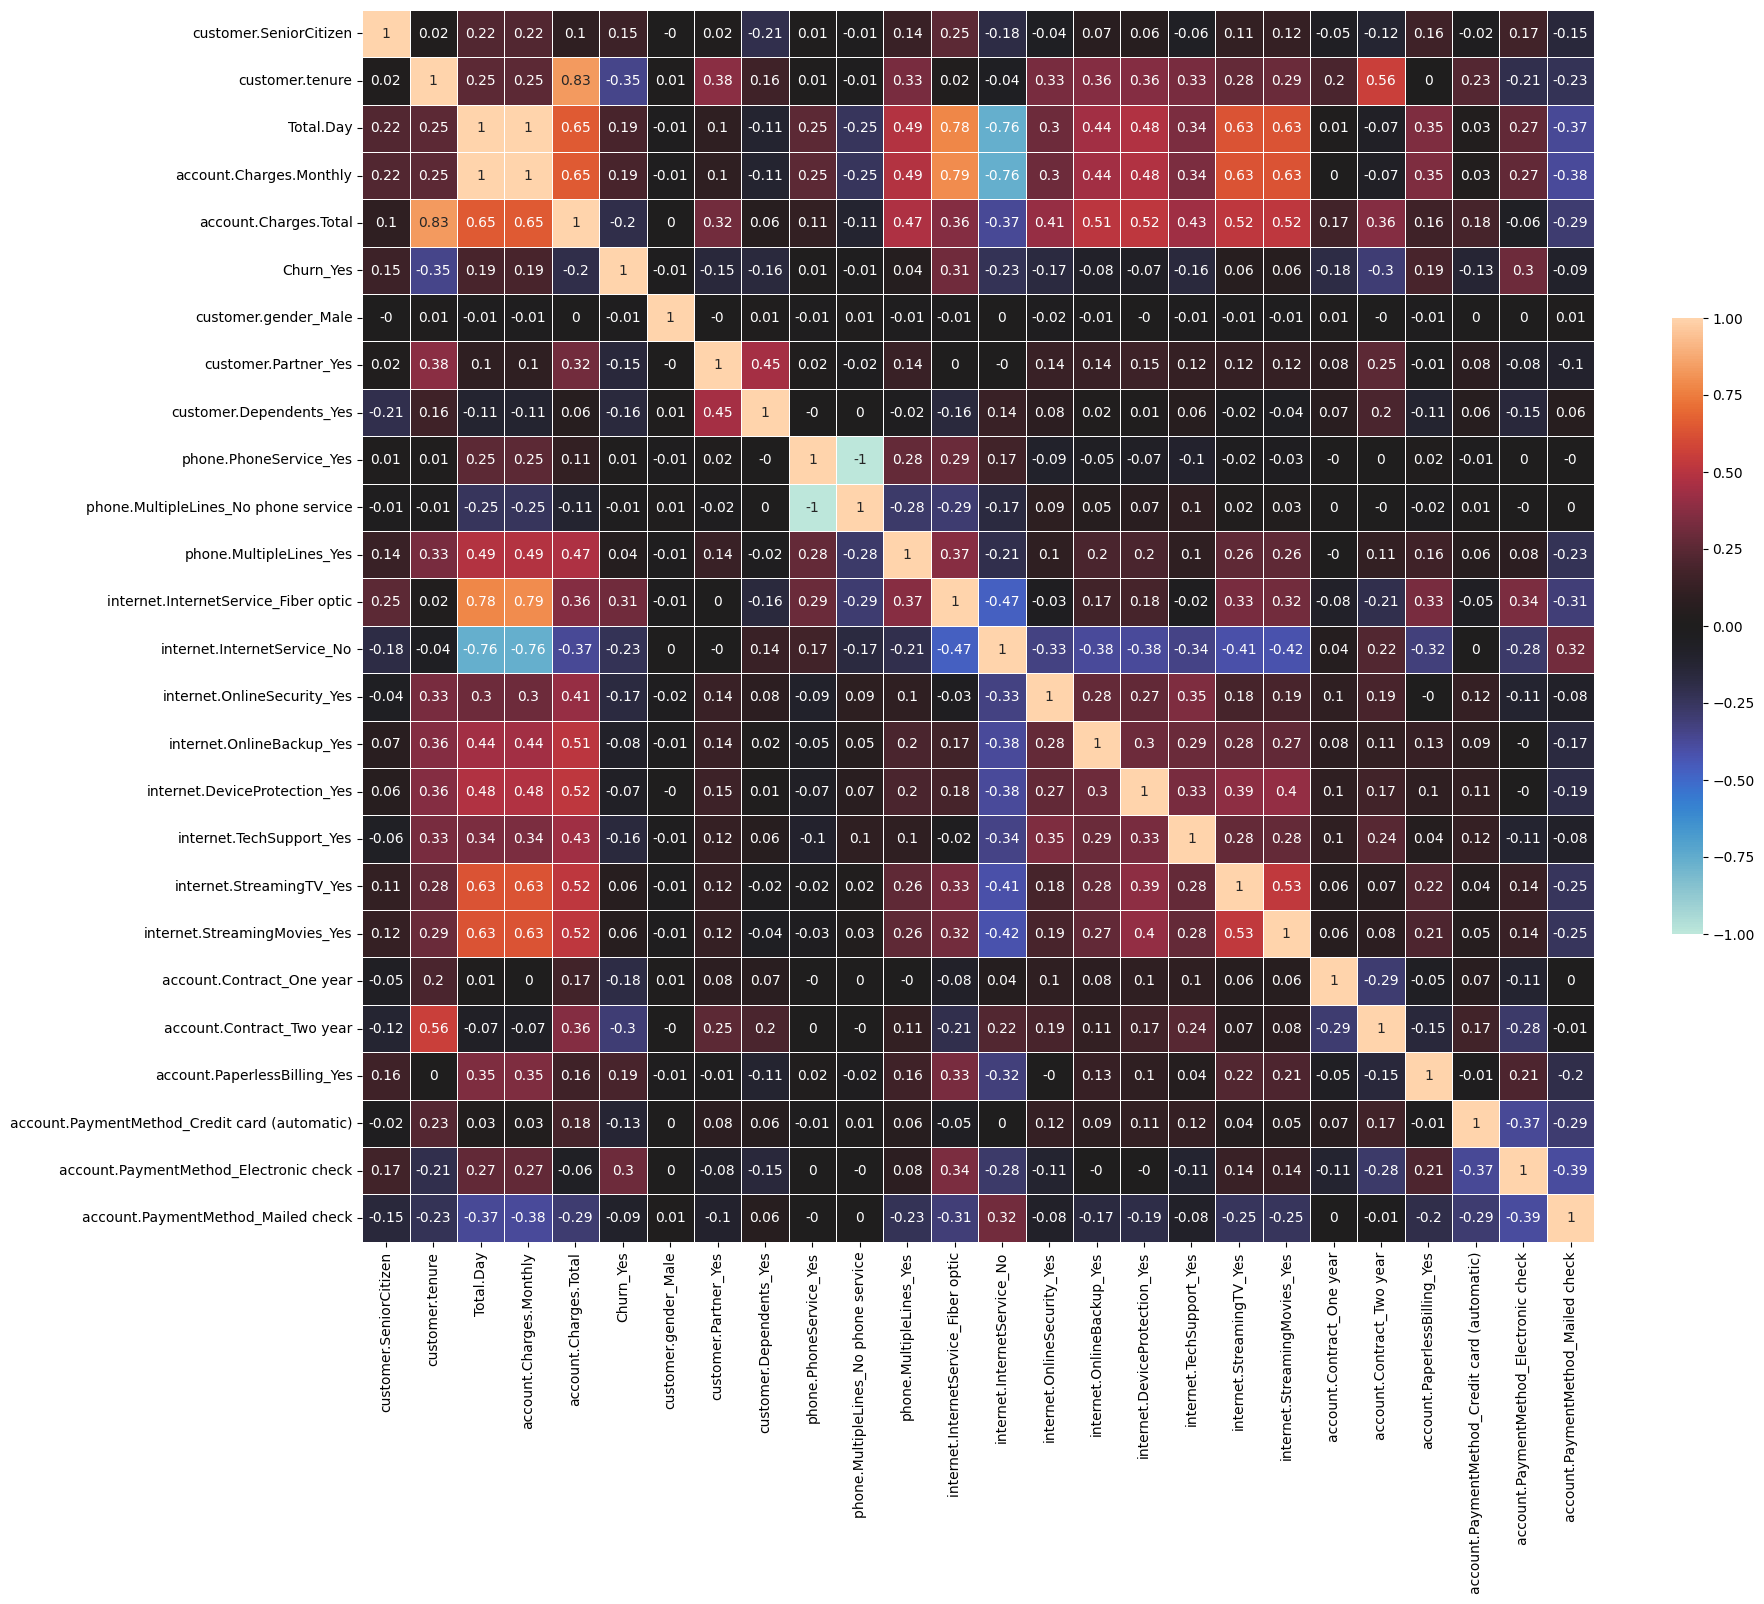

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
corr = df_encoded.corr()

fig, ax= plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
                 square= True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

###🔍 Nota


* Valores cercanos a +1 → fuerte correlación positiva.

* Valores cercanos a -1 → fuerte correlación negativa.

* Valores cercanos a 0 → relación lineal débil o inexistente.

En este contexto, se debe prestar especial atención a las variables que muestran alta correlación con Churn, ya que representan factores clave para explicar y predecir la cancelación de clientes.

Estas variables serán insumos relevantes para la selección de features en la etapa de modelado.

In [ ]:
corr = df_encoded.corr()
corr

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
customer.SeniorCitizen,1.000000,0.015683,0.217622,0.219874,0.102411,0.150541,-0.001819,0.016957,-0.210550,0.008392,...,0.059514,-0.060577,0.105445,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987
customer.tenure,0.015683,1.000000,0.246210,0.246862,0.825880,-0.354049,0.005285,0.381912,0.163386,0.007877,...,0.361520,0.325288,0.280264,0.285402,0.202338,0.563801,0.004823,0.232800,-0.210197,-0.232181
Total.Day,0.217622,0.246210,1.000000,0.996227,0.650921,0.192030,-0.014477,0.097159,-0.112514,0.247900,...,0.481736,0.338021,0.626474,0.626058,0.005252,-0.072454,0.349467,0.029974,0.270270,-0.374906
account.Charges.Monthly,0.219874,0.246862,0.996227,1.000000,0.651065,0.192858,-0.013779,0.097825,-0.112343,0.248033,...,0.482607,0.338301,0.629668,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568
account.Charges.Total,0.102411,0.825880,0.650921,0.651065,1.000000,-0.199484,0.000048,0.319072,0.064653,0.113008,...,0.522881,0.432868,0.515709,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708
Churn_Yes,0.150541,-0.354049,0.192030,0.192858,-0.199484,1.000000,-0.008545,-0.149982,-0.163128,0.011691,...,-0.066193,-0.164716,0.063254,0.060860,-0.178225,-0.301552,0.191454,-0.134687,0.301455,-0.090773
customer.gender_Male,-0.001819,0.005285,-0.014477,-0.013779,0.000048,-0.008545,1.000000,-0.001379,0.010349,-0.007515,...,-0.000807,-0.008507,-0.007124,-0.010105,0.007755,-0.003603,-0.011902,0.001632,0.000844,0.013199
customer.Partner_Yes,0.016957,0.381912,0.097159,0.097825,0.319072,-0.149982,-0.001379,1.000000,0.452269,0.018397,...,0.153556,0.120206,0.124483,0.118108,0.083067,0.247334,-0.013957,0.082327,-0.083207,-0.096948
customer.Dependents_Yes,-0.210550,0.163386,-0.112514,-0.112343,0.064653,-0.163128,0.010349,0.452269,1.000000,-0.001078,...,0.013900,0.063053,-0.016499,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448
phone.PhoneService_Yes,0.008392,0.007877,0.247900,0.248033,0.113008,0.011691,-0.007515,0.018397,-0.001078,1.000000,...,-0.070076,-0.095138,-0.021383,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463


# 🎯 Análisis Dirigido: Variables Clave vs Cancelación (Churn)  

Además del análisis general de correlación, resulta fundamental investigar cómo variables específicas se relacionan con la **cancelación de clientes (Churn)**.  
Este enfoque permite identificar **patrones y tendencias** que podrían convertirse en predictores relevantes dentro del modelo de Machine Learning.  

En particular, se analizaron las siguientes variables:  
- **Tiempo de contrato (Tenure)** × Churn  
- **Gasto total (Total Charges)** × Churn  
- **Relación entre Tenure y Total Charges** × Churn  
- **Tipo de contrato (Contract Type)** × Churn  


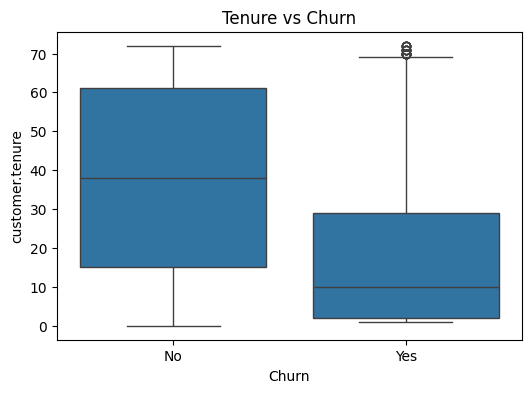

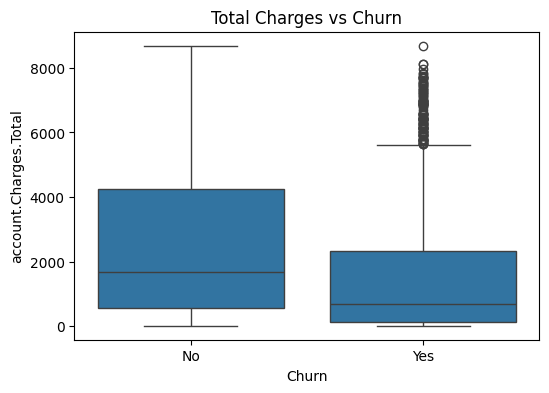

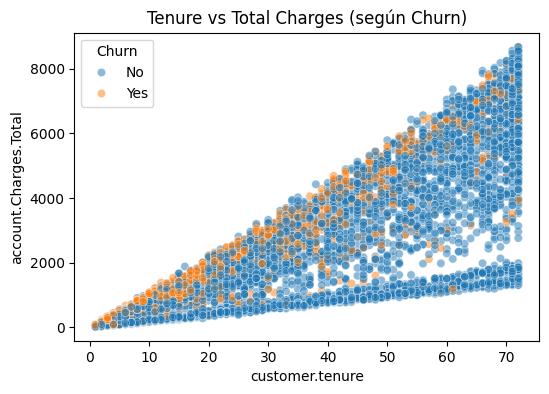

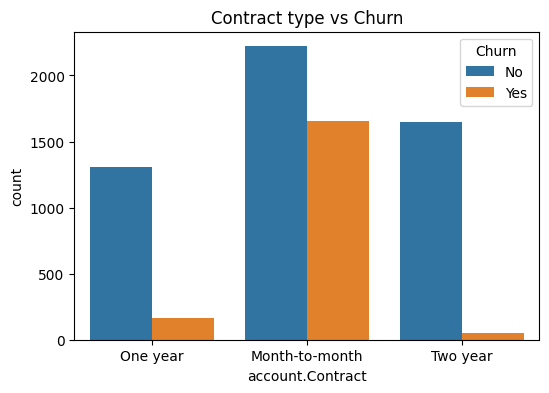

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Tenure vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="customer.tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()

# Boxplot: Total Charges vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="account.Charges.Total", data=df)
plt.title("Total Charges vs Churn")
plt.show()

# Scatter plot: Tenure vs Total Charges, coloreado por Churn
plt.figure(figsize=(6,4))
sns.scatterplot(x="customer.tenure", y="account.Charges.Total", hue="Churn", data=df, alpha=0.5)
plt.title("Tenure vs Total Charges (según Churn)")
plt.show()

# Boxplot: Tipo de contrato vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x="account.Contract", hue="Churn", data=df)
plt.title("Contract type vs Churn")
plt.show()


### 🔍 Interpretación  

**1. Tenure vs Churn**  
- Los clientes con menor tiempo de permanencia presentan una mayor probabilidad de cancelación.  
- A medida que aumenta el tenure, la tasa de churn disminuye.  

**2. Total Charges vs Churn**  
- Los clientes con cargos acumulados más bajos tienden a abandonar antes, lo que sugiere que los primeros meses de relación son críticos para la fidelización.  

**3. Tenure + Total Charges vs Churn (Scatter Plot)**  
- Se observa una concentración de clientes que cancelan en niveles bajos de tenure y cargos totales.  
- Los clientes con mayor antigüedad y gasto acumulado muestran mayor fidelización.  

**4. Contract Type vs Churn**  
- Los contratos de **mes a mes (Month-to-Month)** presentan la mayor tasa de cancelación.  
- Los contratos de mayor duración (**1 año y 2 años**) reflejan una menor propensión al churn.  


# 🤖 Modelación Predictiva

###Separación de Datos  

Antes de entrenar los modelos de *Machine Learning*, es fundamental **dividir el conjunto de datos en entrenamiento y prueba**, con el fin de evaluar el rendimiento de los algoritmos de manera objetiva.  

Una práctica común consiste en utilizar:  
- **70%** de los datos para **entrenamiento**.  
- **30%** de los datos para **prueba**.  

En bases de datos más grandes, también es habitual emplear divisiones de **80/20**.  
Además, se recomienda realizar la división de manera **estratificada** para asegurar que la proporción de clases (Churn vs No Churn) se mantenga equilibrada en ambos subconjuntos.  


In [ ]:
from sklearn.model_selection import train_test_split

# Definimos X (features) y y (target)
X = df_encoded.drop("Churn_Yes", axis=1)
y = df_encoded["Churn_Yes"]

# División en train (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)
print("Distribución en entrenamiento:\n", y_train.value_counts(normalize=True))
print("Distribución en prueba:\n", y_test.value_counts(normalize=True))


Tamaño de entrenamiento: (4922, 25)
Tamaño de prueba: (2110, 25)
Distribución en entrenamiento:
 Churn_Yes
False    0.734254
True     0.265746
Name: proportion, dtype: float64
Distribución en prueba:
 Churn_Yes
False    0.734123
True     0.265877
Name: proportion, dtype: float64


###Resultados de la Separación de Datos  

Tras dividir el conjunto en **70% entrenamiento** y **30% prueba**, se obtuvieron los siguientes tamaños y proporciones:  

- **Tamaño de entrenamiento:** (4,922 filas × 25 columnas)  
- **Tamaño de prueba:** (2,110 filas × 25 columnas)  

### 🔹 Distribución en entrenamiento  
- **Clientes que NO cancelaron:** 73.4%  
- **Clientes que cancelaron:** 26.6%  

### 🔹 Distribución en prueba  
- **Clientes que NO cancelaron:** 73.4%  
- **Clientes que cancelaron:** 26.6%  

---

### 🔍 Interpretación  
- La división mantuvo la **proporción original de clases** (*stratify=y* funcionó correctamente).  
- Esto asegura que tanto el conjunto de entrenamiento como el de prueba representan fielmente el desbalance natural de la variable objetivo (`Churn`).  
- Con esta separación, el modelo podrá entrenarse en un dataset robusto y ser evaluado de manera realista en datos independientes.  


# Creación de modelos

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# ---------------------------
# Modelo 1: Regresión Logística (con normalización)
# ---------------------------
logreg_pipeline = Pipeline([
    ("scaler", StandardScaler()),   # normalizamos
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])


RandomForestClassifier(random_state=42)

In [ ]:
logreg_pipeline.fit(X_train, y_train)

# ---------------------------
# Modelo 2: Random Forest (sin normalización)
# ---------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluación de los modelos


--- Regresión Logística ---
Accuracy: 0.8028436018957346
Precision: 0.6565874730021598
Recall: 0.5418894830659536
F1-Score: 0.59375

Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.90      0.87      1549
        True       0.66      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



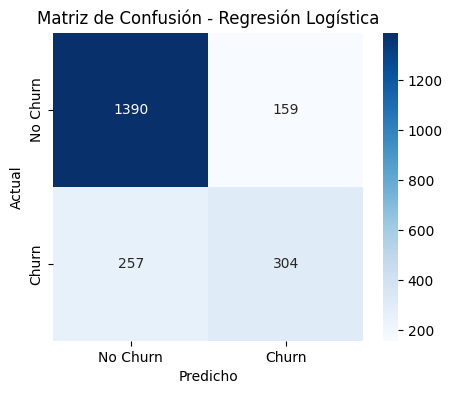


--- Random Forest ---
Accuracy: 0.7928909952606635
Precision: 0.6415525114155252
Recall: 0.5008912655971479
F1-Score: 0.5625625625625625

Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.90      0.86      1549
        True       0.64      0.50      0.56       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



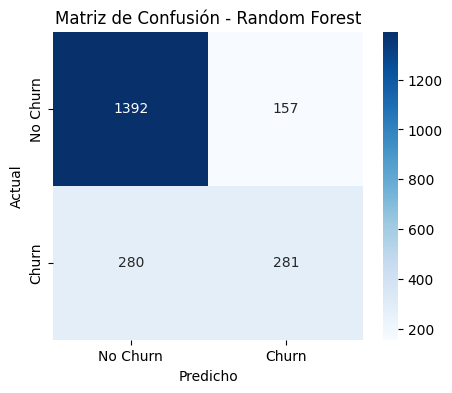

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------
# Predicciones
# -------------------
y_pred_logreg = logreg_pipeline.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# -------------------
# Función de evaluación
# -------------------
def evaluar_modelo(y_true, y_pred, nombre):
    print(f"\n--- {nombre} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.ylabel("Actual")
    plt.xlabel("Predicho")
    plt.show()

# -------------------
# Evaluamos ambos modelos
# -------------------
evaluar_modelo(y_test, y_pred_logreg, "Regresión Logística")
evaluar_modelo(y_test, y_pred_rf, "Random Forest")


# Análisis de la Importancia de las Variables

In [ ]:
import numpy as np

# Extraemos coeficientes del modelo
coeficientes = logreg_pipeline.named_steps["logreg"].coef_[0]
variables = X.columns

# Ordenamos por importancia
coef_df = pd.DataFrame({"Variable": variables, "Coeficiente": coeficientes})
coef_df["Importancia"] = np.abs(coef_df["Coeficiente"])
coef_df = coef_df.sort_values(by="Importancia", ascending=False)

print("Top 10 variables (Regresión Logística):")
print(coef_df.head(10))


Top 10 variables (Regresión Logística):
                                  Variable  Coeficiente  Importancia
1                          customer.tenure    -1.351796     1.351796
4                    account.Charges.Total     0.633144     0.633144
11    internet.InternetService_Fiber optic     0.561012     0.561012
20               account.Contract_Two year    -0.542193     0.542193
3                  account.Charges.Monthly    -0.510942     0.510942
12             internet.InternetService_No    -0.470508     0.470508
19               account.Contract_One year    -0.285224     0.285224
17                internet.StreamingTV_Yes     0.188641     0.188641
23  account.PaymentMethod_Electronic check     0.183308     0.183308
21            account.PaperlessBilling_Yes     0.180591     0.180591


In [ ]:
# Importancia de variables en Random Forest
importancia_rf = pd.DataFrame({
    "Variable": X.columns,
    "Importancia": rf_model.feature_importances_
}).sort_values(by="Importancia", ascending=False)

print("Top 10 variables (Random Forest):")
print(importancia_rf.head(10))


Top 10 variables (Random Forest):
                                  Variable  Importancia
4                    account.Charges.Total     0.173123
1                          customer.tenure     0.149771
3                  account.Charges.Monthly     0.145230
2                                Total.Day     0.129778
23  account.PaymentMethod_Electronic check     0.042908
11    internet.InternetService_Fiber optic     0.042375
20               account.Contract_Two year     0.028882
5                     customer.gender_Male     0.024607
21            account.PaperlessBilling_Yes     0.023512
16                internet.TechSupport_Yes     0.021013


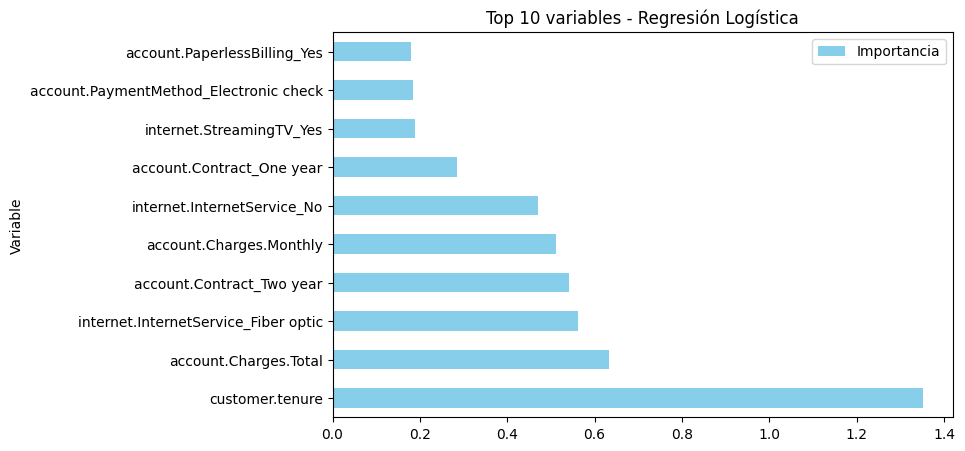

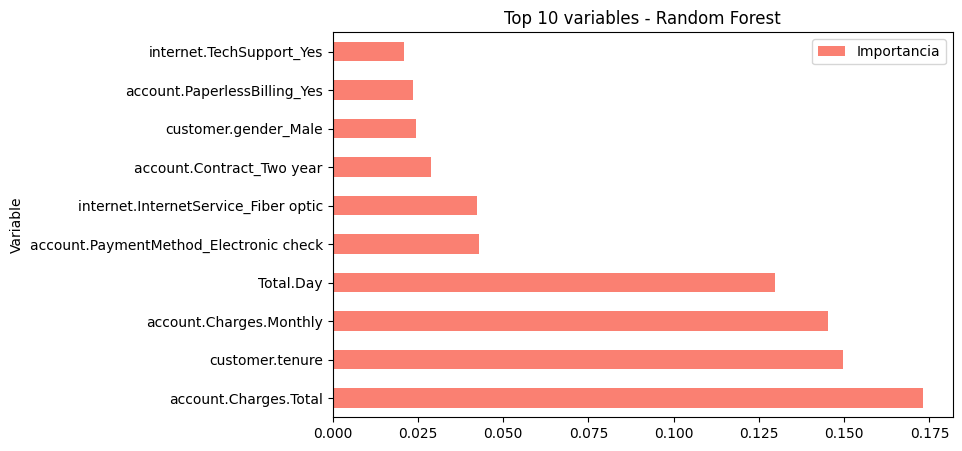

In [ ]:
# Gráfico Regresión Logística
coef_df.head(10).plot(x="Variable", y="Importancia", kind="barh", figsize=(8,5), color="skyblue")
plt.title("Top 10 variables - Regresión Logística")
plt.show()

# Gráfico Random Forest
importancia_rf.head(10).plot(x="Variable", y="Importancia", kind="barh", figsize=(8,5), color="salmon")
plt.title("Top 10 variables - Random Forest")
plt.show()


# Conclusión
Se analizaron los datos de clientes para entender por qué algunos cancelan el servicio (Churn) y construimos modelos que nos ayudan a predecir quiénes tienen más riesgo de cancelar.

Descubrimos que el 26% de los clientes cancela, mientras que la mayoría (74%) permanece activa.
Los factores más importantes que explican la cancelación son:
- Tener un contrato mes a mes.
- Ser cliente nuevo (poco tiempo con la empresa).
- Pagar cargos mensuales altos.
- Usar fibra óptica como servicio de internet.

Se probaron dos modelos de predicción:
- La Regresión Logística, que es más simple y ayuda a entender las relaciones.
- El Random Forest, que resultó más preciso y equilibrado para detectar cancelaciones. El Random Forest es el modelo más adecuado para predecir cancelación en este caso.
Las variables clave para la cancelación son:
Tipo de contrato, Tiempo con la empresa, Nivel de cargos (mensuales y totales),
Tipo de servicio de internet

En cuanto a la evaluación de modelos, se obtuvo:
Métricas comparadas (accuracy, precision, recall, f1-score):
- Regresión Logística:
Buen recall → detecta bien a los clientes que cancelan.
Menor precision → algunos falsos positivos.

-Random Forest:
Mejor accuracy y balance entre precision y recall.
Modelo más robusto para predecir Churn.

Esto permite diseñar estrategias de retención enfocadas en:
- Ofrecer incentivos a clientes con contratos mes a mes.
- Programas de fidelización para clientes nuevos.
- Ajustes de tarifas para quienes tienen cargos elevados.

Con los resultados, la empresa puede tomar medidas para retener clientes, como:
- Ofrecer planes más estables (contratos anuales).
- Crear programas de bienvenida y fidelización para nuevos clientes.
- Ajustar precios o beneficios para quienes tienen cargos más altos.